In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Danki_Tobias.helper.environment_definitions import cripple_options_evaluation, cripple_options_training

In [32]:
data_type_options = ['position', 'position_deltas', 'position_and_velocity', 'position_and_velocity_deltas']
train_on_options = ['non_crippled', 'multiple_envs']
algorithms = ['normal', 'online_adaptation', 'meta']
names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5',
         'eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']

training_names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5']
evaluation_names = ['eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']

def read_average_reward(data_type, train_on, algorithm, name):
    file_name = f'../data/{data_type}/on_policy/trained_on_{train_on}/{algorithm}/evaluation_{name}.txt'
    with open(file_name, "r") as file:
        file.readline()
        file.readline()
        text = file.readline()
    _, average_reward = text.split("=")
    return float(average_reward)


def read_all_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    all_rewards = pd.Series(rewards, index=multi_index)
    return all_rewards

all_rewards = read_all_rewards()

Plots comparing the rewards achieved on different states

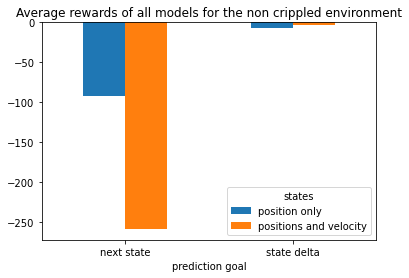

In [33]:
rewards = all_rewards[:, :, :, 'training_0']
rewards = rewards.groupby(level=[0]).mean()

multi_index = pd.MultiIndex.from_product([['next state', 'state delta'], ['position only', 'positions and velocity']],
                                             names=["prediction goal", "states"])
test = [rewards['position'], rewards['position_and_velocity'],
        rewards['position_deltas'], rewards['position_and_velocity_deltas']]
data = pd.Series(test, index=multi_index)

data.unstack().plot(kind='bar', rot=0)
plt.title("Average rewards of all models for the non crippled environment")
plt.savefig("../results/CompareStateDefinitions.png")

Plots comparing the performance of Model A, B and C

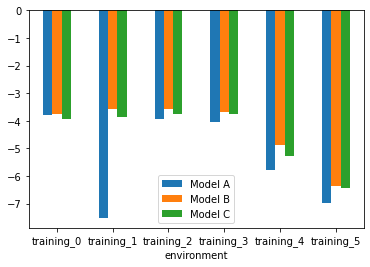

In [88]:
data = all_rewards['position_and_velocity_deltas', 'multiple_envs']
data.index = data.index.set_levels(['Model C', 'Model A', 'Model B'], level=0)
data.index = data.index.set_names(['', 'environment'])
data = data.sort_index()

training_rewards = data.loc[:, training_names]
training_rewards = training_rewards.swaplevel(i=0, j=1, )

training_rewards.unstack().plot(kind='bar', rot=0)
plt.savefig("../results/CompareModelsTraining.png")

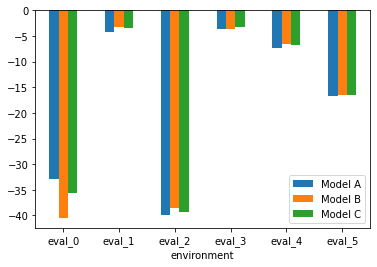

In [89]:
evaluation_rewards = data.loc[:, evaluation_names]
evaluation_rewards = evaluation_rewards.swaplevel(i=0, j=1, )

evaluation_rewards.unstack().plot(kind='bar', rot=0)
plt.savefig("../results/CompareModelsTestNonCripple.png")

Plots comparing the performance of all Models trained on non-crippled only vs multiple_envs

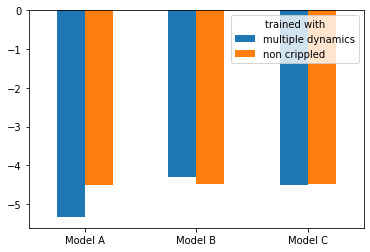

In [90]:
data = all_rewards['position_and_velocity_deltas']
data.index = data.index.set_levels(['multiple dynamics', 'non crippled'], level=0)
data.index = data.index.set_levels(['Model C', 'Model A', 'Model B'], level=1)
data.index = data.index.set_names(['trained with','', 'environment'])
data = data.sort_index()

training_rewards = data.loc[:,:, training_names]

training_rewards = training_rewards.swaplevel(i=0, j=1, )
training_rewards = training_rewards.groupby(level=[0, 1]).mean()
training_rewards.unstack().plot(kind='bar', rot=0)
plt.savefig("../results/CompareModelsTrainingOptionsTraining.png")

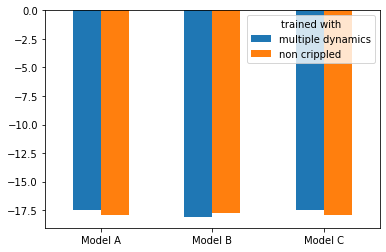

In [91]:
evaluation_rewards = data.loc[:,:, evaluation_names]

evaluation_rewards = evaluation_rewards.swaplevel(i=0, j=1, )
evaluation_rewards = evaluation_rewards.groupby(level=[0, 1]).mean()
evaluation_rewards.unstack().plot(kind='bar', rot=0)
plt.savefig("../results/CompareModelsTrainingOptionsTest.png")


Plots comparing the performance of a Model trained on non-crippled only vs multiple_envs

In [45]:
model_name = 'meta'
model_name_new = "Model C"

data = all_rewards['position_and_velocity_deltas', :, model_name]
print(data)

train_on       name      
non_crippled   training_0    -3.194968
               training_1    -3.966100
               training_2    -3.765653
               training_3    -3.751147
               training_4    -5.129443
               training_5    -7.120714
               eval_0       -39.584515
               eval_1        -3.558611
               eval_2       -38.732162
               eval_3        -3.242995
               eval_4        -6.267185
               eval_5       -16.322858
multiple_envs  training_0    -3.944157
               training_1    -3.867693
               training_2    -3.739194
               training_3    -3.753920
               training_4    -5.266313
               training_5    -6.448257
               eval_0       -35.606845
               eval_1        -3.486987
               eval_2       -39.302903
               eval_3        -3.316385
               eval_4        -6.750672
               eval_5       -16.432400
dtype: float64


In [ ]:
data = all_rewards['position_and_velocity_deltas', :, :, 'training_0']


This plot shows

<AxesSubplot:xlabel='train_on,algorithm'>

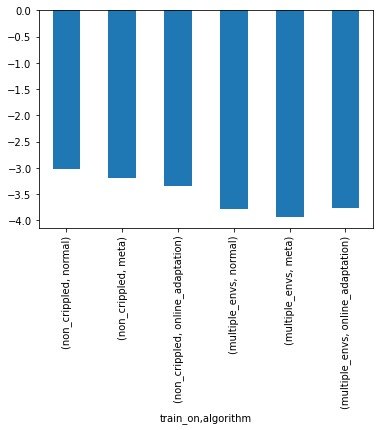

In [23]:
all_rewards['position_and_velocity_deltas', :, :, 'training_0'].plot(kind='bar')

<AxesSubplot:xlabel='name'>

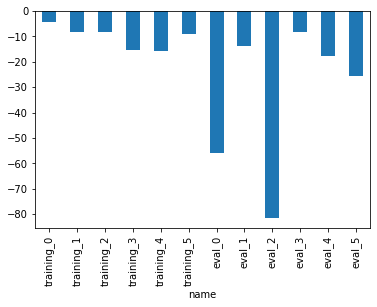

In [22]:
all_rewards['position', 'multiple_envs', 'normal', 'alle_training_envs'].plot(kind='bar')
all_rewards['position', 'non_crippled', 'normal', 'alle_training_envs'].plot(kind='bar')
